<a href="https://colab.research.google.com/github/venkatanadikatla/pytorch/blob/main/Bayesian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pymc arviz


In [2]:
!pip install jax jaxlib


In [ ]:
from google.colab import files
uploaded = files.upload()



Overview:
Strengths of Bayesian Statistics that are critical here:
1. Great flexibility to quickly and iteratively build statistical models.
2. Offers principled way of dealing with uncertainity.
3. Don't just want most likely outcome but distribution of all possible outcomes.
4. Allows expert information to guide model by using informative priors.

In this, you will learn:
1. How to go from data to a model data.
2. How to find priors for your model.
3. How to evaluate model.
4. How to iteratively improve a model.
5. How to forecast into the future.
6. How to powerful generative modelling can be.


In [9]:
from google.colab import files
uploaded = files.upload()


Saving Student.csv to Student.csv


In [8]:
df = pd.read_csv('Student.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Student.csv'

In [23]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


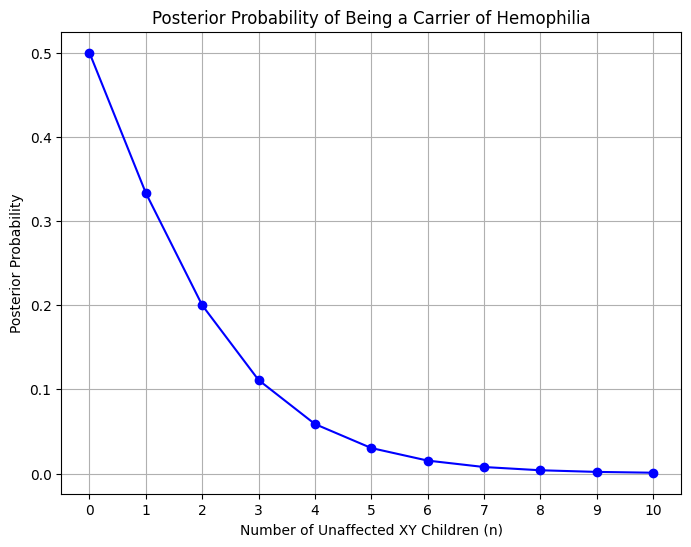

In [4]:
# Module 1 L2
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm

# 1. Function to compute posterior probability:
def compute_posterior(n, prior=0.5):
    """
    Computes the posterior probability of being a carrier after observing n unaffected XY children.
    """
    # Likelihood: 50% chance of unaffected child for a carrier
    likelihood = 0.5 ** n

    # Marginal likelihood: prior * likelihood + (1 - prior)
    marginal_likelihood = likelihood * prior + 1 * (1 - prior)

    # Posterior probability: Bayes' theorem
    posterior_carrier = likelihood * prior / marginal_likelihood

    return posterior_carrier

# 2. Function to visualize the posterior probability:
def visualize_posterior(max_n):
    n_values = np.arange(0, max_n+1)
    posterior_carrier_values = [compute_posterior(n) for n in n_values]

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(n_values, posterior_carrier_values, label="Posterior Probability", color='blue', marker='o')
    plt.title("Posterior Probability of Being a Carrier of Hemophilia")
    plt.xlabel("Number of Unaffected XY Children (n)")
    plt.ylabel("Posterior Probability")
    plt.xticks(n_values)
    plt.grid(True)
    plt.show()

# Example usage:
max_n = 10
visualize_posterior(max_n)


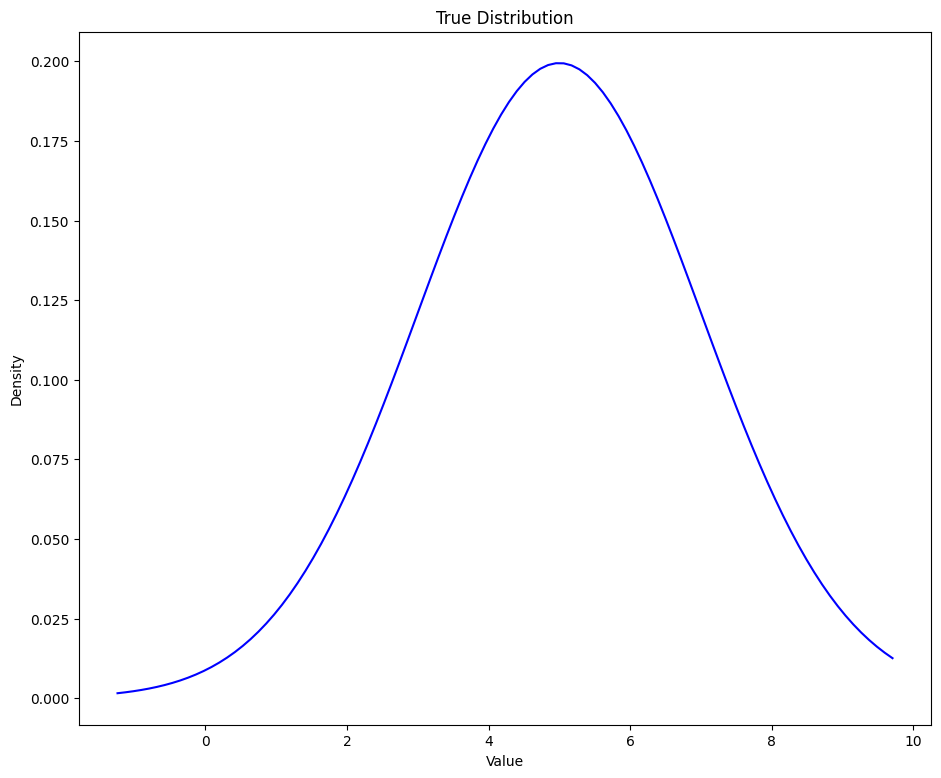

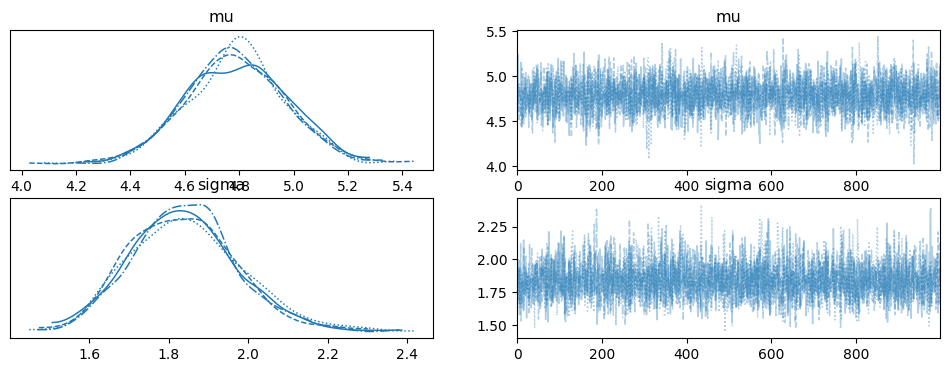

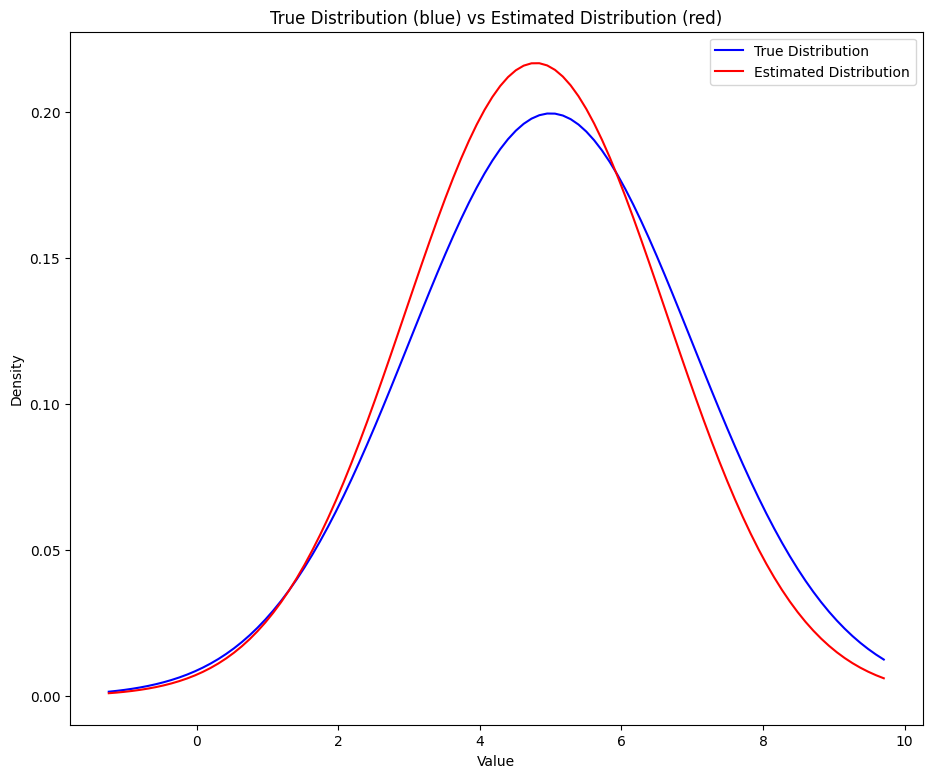

        mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
mu     4.789  0.182     4.439      5.144      0.003    0.002    3677.0   
sigma  1.841  0.137     1.591      2.121      0.002    0.002    3880.0   

       ess_tail  r_hat  
mu       2630.0    1.0  
sigma    2871.0    1.0  


In [5]:
# Module 1 L3
# 1. Loading the necessary libraries:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

# 2. Setting the seed:
np.random.seed(42)

# 3. Generating the Data:
n = 100
true_mean = 5
true_sd = 2
y = np.random.normal(true_mean, true_sd, n)

# 4. Plotting the True Distribution:
true_data_x = np.linspace(min(y) - 1, max(y) + 1, 100)
true_data_y = (1 / (true_sd * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((true_data_x - true_mean) / true_sd) ** 2)

plt.plot(true_data_x, true_data_y, color='blue', label="True Distribution")
plt.title("True Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

# 5. Defining the PyMC Model:
with pm.Model() as model:
    # Priors for unknown parameters
    mu = pm.Normal('mu', mu=0, sigma=10)  # Prior for the mean
    sigma = pm.HalfNormal('sigma', sigma=10)  # Prior for the standard deviation

    # Likelihood (sampling distribution of observed data)
    y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma, observed=y)

    # 6. Fitting the model
    trace = pm.sample(1000, chains=4, return_inferencedata=True, random_seed=123)

# 7. Extracting Posterior Samples and summarizing
az.plot_trace(trace)
plt.show()

# 8. Calculating posterior means
mu_mean = trace.posterior['mu'].mean().item()
sigma_mean = trace.posterior['sigma'].mean().item()

# 9. Plotting the Estimated Distribution
estimated_data_x = np.linspace(min(y) - 1, max(y) + 1, 100)
estimated_data_y = (1 / (sigma_mean * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((estimated_data_x - mu_mean) / sigma_mean) ** 2)

plt.plot(true_data_x, true_data_y, color='blue', label="True Distribution")
plt.plot(estimated_data_x, estimated_data_y, color='red', label="Estimated Distribution")
plt.title("True Distribution (blue) vs Estimated Distribution (red)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

# 10. Summary statistics
print(az.summary(trace, hdi_prob=0.95))


FileNotFoundError: [Errno 2] No such file or directory: 'Student.csv'